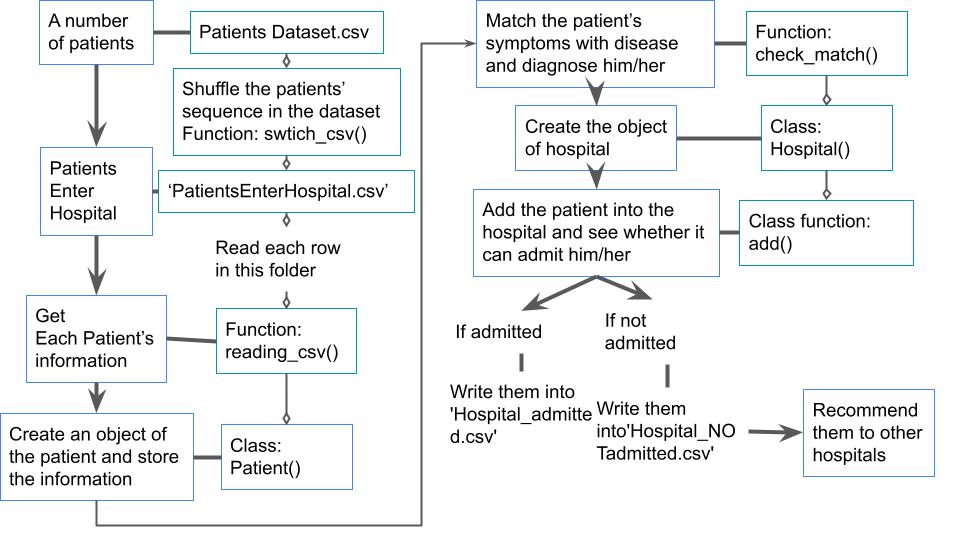

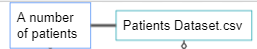

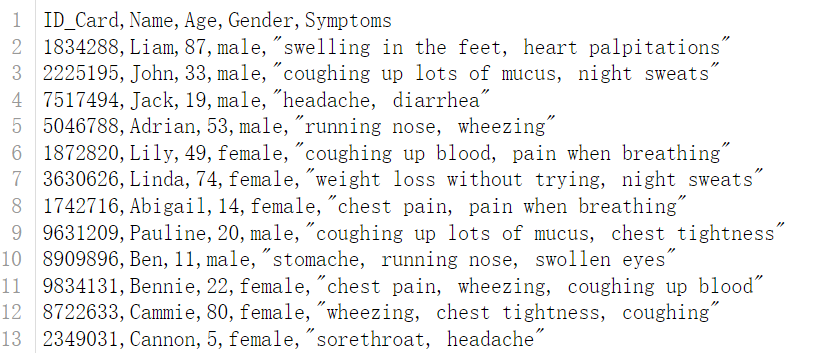

In [31]:
import csv

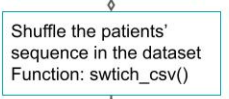

In [35]:
def switch_csv(name):
    import pandas as pd
    import csv
    df = pd.read_csv(name, header=None, skiprows=1)
    ds = df.sample(frac=1)
    ds.to_csv('PatientsEnterHospital.csv', index=None)

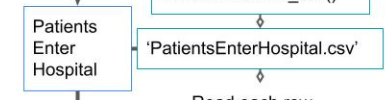

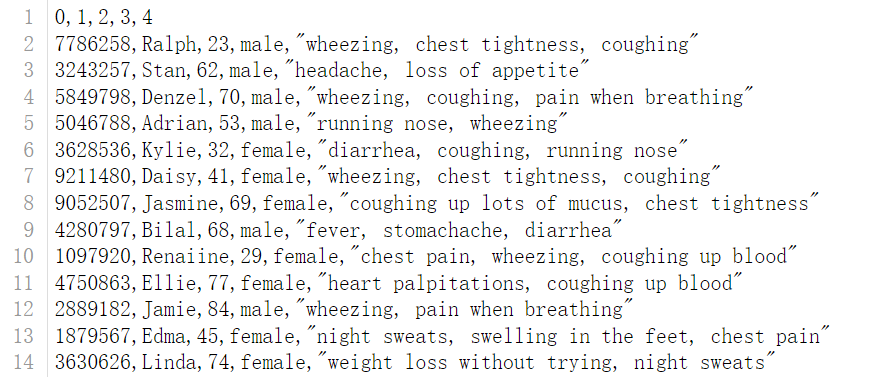

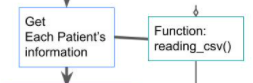

In [36]:
def reading_csv(name):    
    with open(name) as csv_file: # open the file to read and it will colse the file autommatically
            csv_reader = csv.reader(csv_file, delimiter=',') # split all the columns by comma
            next(csv_reader) # skip the first row

            for row in csv_reader: # read row one by one
                ID_card = row[0] # give every row a varieable
                name = row[1]
                age = row[2]
                gender = row[3]
                symptoms = row[4].split(', ') # split the strings in the column of symptoms by comma
                patient = Patient(ID_card, name, age, gender, symptoms[0], symptoms[1]) # pass all the formal parameters to the Patient class, and name the whole class with patient
                hospital.add(patient) 
                # add the patient's information to the Hospital class, 
                # and the same as the method we just did, we will use the lowercase hospital to represent the class Hospital which have been passed actual parameters 

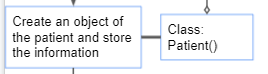

In [33]:
class Patient(object): 
    def __init__(self, id_card, name, age, gender, symptom1, symptom2):
        self.id_card = id_card # create properties for each patient
        self.name = name
        self.age = age
        self.gender = gender
        self.symptom1 = symptom1.lower()
        self.symptom2 = symptom2.lower()

actually we have already used Patient class in reading_csv() to store the information

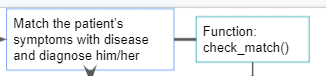

However, we will use this function later in the class of Hospital

In [32]:
def check_match(symptom1, symptom2):
    with open('new_Diseases and Symptoms - Sheet1.csv') as csv_file:
                    csv_reader = csv.reader(csv_file, delimiter=',') # seperate the disease and symptom by comma
                    next(csv_reader) # skipping the first line of the file
                    for row in csv_reader: # read the file row by row
                        symptoms = row[1].lower().split(', ') # read the second row of and seperate symptoms by ,+blank 
                        if symptom1 in symptoms and symptom2 in symptoms: # if 2 symptoms of the patient relate to one disease 
                            Possible_Disease = row[0] # then the patient will be diagnose with the specific disase
                            return Possible_Disease # get the result for what specific disease the patient is diagnosed

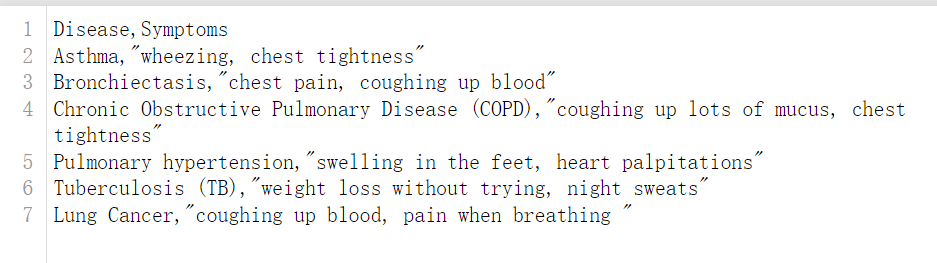

this is the list of diseases that this hospital can diagnose and treat

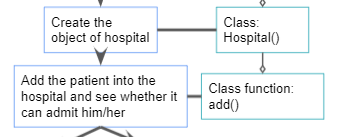

There are two criteria to determine whether to accept this patient.
One is that whether the disease can be diagnosed and treated by the hospital.
Second is that whether the hospital is full.
We will assume that the hospital's capacity is 15 patients.
This will be shown later when we pass actual parameter to Hospital() class.

In [34]:
class Hospital(object):
    def __init__(self, name, capacity): # initiate the properties for each hospital
        self.name = name
        self.patients_admitted = [] # create the list consisting admitted patients for each hospital
        self.patients_NOTadmitted = [] # create the list consisting patients who are not admitted for each hospital
        self.capacity = capacity

    def add(self, patient): # using this function to identify the admitted patients and add them to the csv file of the hospital

        patient_dictionary = { # using the dictionary to store information for each patient
            'ID': patient.id_card,
            'Name': patient.name,
            'Age': patient.age,
            'Gender': patient.gender,
            'Possible Disease' : 'Unknown',
            'Symptoms': str(patient.symptom1) + ', ' + str(patient.symptom2),
            'Remark': '' # store the remark for each patient print he is admitted 
            }

        if len(self.patients_admitted) < self.capacity: # if the hospital is not full then it can still add patients
            

            if check_match(patient.symptom1, patient.symptom2) != None: # check if the patient has the symptom that the hospital can treat
                patient_dictionary['Possible Disease'] = check_match(patient.symptom1, patient.symptom2) # diagnose the patient using the check_match function
                patient_dictionary['Remark'] = 'The Hospital treats the disease.' # print out the treatment information an the patient's information
                print('\n{} has been admitted.\nPossible Disease: {}. \nSymptoms: {}.'.format(patient.name, patient_dictionary['Possible Disease'], patient_dictionary['Symptoms']))
                self.patients_admitted.append(patient_dictionary) # store the patient into the admitted person's dictionary

            else:  # if we can't diagnose the disease with check_match then the hospital doesn't treat such disease
                patient_dictionary['Remark'] = 'The Hospital does not treats the disease.'
                print("""\nSorry! The hospital does not treat diseases with given symptoms.\n{} has NOT been admitted.
                \nPossible Disease: {}. \nSymptoms: {}.""".format(patient.name, patient_dictionary['Possible Disease'], patient_dictionary['Symptoms']))
                self.patients_NOTadmitted.append(patient_dictionary)
                        
        elif len(self.patients_admitted) >= self.capacity: # if the hospital is full then it won't add any patient
            patient_dictionary['Remark'] = 'The Hospital is FULL.'
            print('\nSorry! The Hospital is full.\n{} has NOT been admitted. We already have {} patients'.format(patient.name,len(self.patients_admitted)))
            self.patients_NOTadmitted.append(patient_dictionary) # store the patient into the not admitted person's dictionary

actually, we have already used Hospital class in reading_csv for the class is to have object-oriented programming

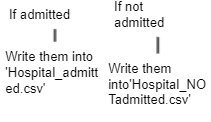

In [37]:
def writing_csv(array_of_dicts):
    if len(array_of_dicts) == 15: 
        # if the length of the list of patients is 15, then it must be the list for admitted patients, 
        # the list reffers to "self.patients_admitted = []" ,which we created in the class of hospital
        toCSV = array_of_dicts 
        with open('Hospital_admitted.csv', 'w', encoding='utf8', newline='') as output_file: 
            # open the file of 'Hospital_admitted.csv' to write down the list of patients, 
            # if it is not there, we will create this file,if it is there, the previous information will the covered
            fc = csv.DictWriter(output_file, 
                                fieldnames=toCSV[0].keys(),
                            ) # using the DictWriter function to write in a csv file
            fc.writeheader()
            fc.writerows(toCSV) 
    else:
        toCSV = array_of_dicts
        with open('Hospital_NOTadmitted.csv', 'w', encoding='utf8', newline='') as output_file:
            fc = csv.DictWriter(output_file, 
                                fieldnames=toCSV[0].keys(),
                            )
            fc.writeheader()
            fc.writerows(toCSV)


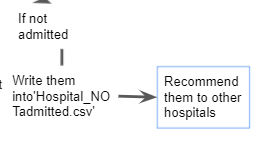

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def recommended_hospitals():
    page = requests.get("https://www21.ha.org.hk/smartpatient/SPW/en-us/Useful-Resource/Patient-Group/List/?guid=ebe3f3f7-cd2b-4573-882e-cfd61eac55ac") # Response 200

    soup = BeautifulSoup(page.content, 'html.parser')
    all_contents = soup.find_all('div', class_ = 'content')

    Organizations_list = []

    for i in range(len(all_contents)):
        Organization_name = all_contents[i].find('div', class_ = 'organzation').get_text()
        Organization_loc = all_contents[i].find_all('div')[1].get_text().strip('c/o')
        Organization_phone = all_contents[i].find_all('div', class_ = 'contact')[0].find_all('div')[1].get_text()
        Organization_fax = all_contents[i].find_all('div', class_ = 'contact')[1].find_all('div')[1].get_text()

        Organization_dict = {
        'Name': Organization_name,
        'Location' : Organization_loc,
        'Phone' : Organization_phone,
        'Fax' : Organization_fax,
        'Email' : '',
        'Website' : ''
        }

        try:
            Organization_email = all_contents[i].find_all('div', class_ = 'contact')[2].find_all('div')[1].get_text()
            Organization_dict['Email'] = Organization_email
            
            Organization_website = all_contents[i].find_all('div', class_ = 'contact')[3].find('a').get_text()
            Organization_dict['Website'] = Organization_website
        except IndexError:
            pass

        Organizations_list.append(Organization_dict)

    df = pd.DataFrame(Organizations_list) # if we want dataframe 
    print(df)
    df.to_csv("Recommended_hospitals.csv", header=["Name", "Location", "Phone", "Fax", "Email", "Website"], index = False) # if we want csv

now we run the code and 
First: print out the patient's diagnostic result 
Second: print whether he is admitted by the hospital
Third: print out the recommended hospitals' information

In [38]:
hospital = Hospital('Care Medical Hospital', 15) 
# as we mentioned before, we name the class Hospital which have been passed actual parameters, which is more convenient for us to programm based on objects
switch_csv('Patients dataset - Sheet1.csv')
reading_csv('PatientsEnterHospital.csv')
# use the reading_cse founcion which we created to read the file of patients' information
writing_csv(hospital.patients_admitted) # use the writing_csv founciton which we created to write the file consisting admitted patients
writing_csv(hospital.patients_NOTadmitted) # same as the previous one
print('Below is the list of Recommended hospitals:')
recommended_hospitals() 
# use the recommended_hospitals() funcion which we created to craw other hospital information on the internet 
# to recommend other hospitals for the not admitted patients


Ralph has been admitted.
Possible Disease: Asthma. 
Symptoms: wheezing, chest tightness.

Sorry! The hospital does not treat diseases with given symptoms.
Stan has NOT been admitted.
                
Possible Disease: Unknown. 
Symptoms: headache, loss of appetite.

Sorry! The hospital does not treat diseases with given symptoms.
Denzel has NOT been admitted.
                
Possible Disease: Unknown. 
Symptoms: wheezing, coughing.

Sorry! The hospital does not treat diseases with given symptoms.
Adrian has NOT been admitted.
                
Possible Disease: Unknown. 
Symptoms: running nose, wheezing.

Sorry! The hospital does not treat diseases with given symptoms.
Kylie has NOT been admitted.
                
Possible Disease: Unknown. 
Symptoms: diarrhea, coughing.

Daisy has been admitted.
Possible Disease: Asthma. 
Symptoms: wheezing, chest tightness.

Jasmine has been admitted.
Possible Disease: Chronic Obstructive Pulmonary Disease (COPD). 
Symptoms: coughing up lots of mucu

Lastly we can also analyse the lung disease frequency of admitted patients

[7, 0, 3, 1, 4, 0]


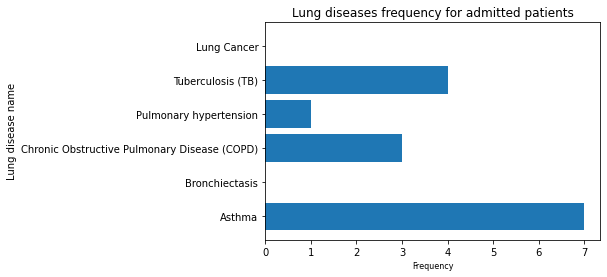

In [39]:
disease = [0]* 6 # a list for counting the number of patients with certain lung diseases
disease_name = ["Asthma", 
                "Bronchiectasis", 
                "Chronic Obstructive Pulmonary Disease (COPD)", 
                "Pulmonary hypertension", 
                "Tuberculosis (TB)", 
                "Lung Cancer"] # the list of lung diseases 

import csv
import matplotlib.pyplot as plt
    
with open("Hospital_admitted.csv", 'r') as file: # open Hospital_admmitted.csv file for reading
    csv_file = csv.reader(file) # read Hospital_admitted.csv file
    next (csv_file) # skip the first line, as it shows "ID", "Name", "Age",... "Remark"
    
    for row in csv_file:
        if row[4] == "Asthma": 
            disease [0] += 1 # if the detected disease is Asthma, increment index [0] in disease list for counting by one
        elif row[4] == "Bronchiectasis": 
            disease [1] += 1 # if the detected disease is Bronchiectasis, increment index [1] in disease list for counting by one
        elif row [4] == "Chronic Obstructive Pulmonary Disease (COPD)": 
            disease [2] += 1 # if the detected disease is COPD, increment index [2] in disease list for counting by one
        elif row [4] == "Pulmonary hypertension":
            disease [3] +=1 # if the detected disease is Pulmonary hypertension, increment index [3] in disease list for counting by one
        elif row [4] == "Tuberculosis (TB)":
            disease [4] += 1 # if the detected disease is Tuberculosis (TB), increment index [4] in disease list for counting by one
        elif row [4] == "Lung Cancer":
            disease [5] += 1 # if the detected disease is Lung Cancer, increment index [5] in disease list for counting by one
            
print(disease) # shows the number of people with the certain lung disease

# plot
plt.barh(disease_name, disease)
plt.xlabel("Frequency", fontsize=8)
plt.ylabel ("Lung disease name")
plt.title("Lung diseases frequency for admitted patients")
plt.show()